#### Name - Pushkar Ashok Narkehde
#### Roll - 2203528 | MITU20BTCSD018
#### Class - TY CSE IS3 batch B

#### Assignment 4

##### Aim - 
-  Develop a Bayesian classifier on any dataset.

##### Objective - 
1. To learn bayes theorem
2. To implement Bayesian classifier

##### Theory - 
##### Bayes Theorem basic Intution - 
    1. Baye's theorem is basically used to find the probability of event A when we know the probabiity of even e1,e2.....,en.
    2. the formulation of Bayes theorem is like Posterior = Prior * Likelihood / evidence, in simple P(A|E) = P(A) * P(A and E) / P(E), where P(A|E) is probability of event A such that event E is already happned that we tries to find overall.
    3. Baye's theorem is nothing but an extension of conditional probability and it allows to find P(A|B) from P(B|A)
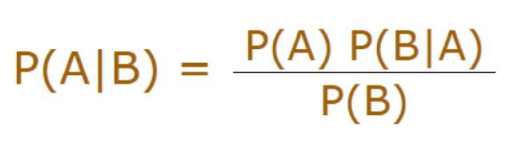

    4. P(A) is prior probability or we can say that marginal probability of A. it is prior in the sense it does not take any information about B.
    5. P(A|B) is the conditional probability  of A given B. it is also called as posterior probability because it is derived from the specified value B.
    6. P(B|A) is conditional probability of B given A. it is also called as likelihood.
    7. P(B) is also called as prior  or marginal probability of B, and it acts as normalizing constant.
    8. if we consider baye's theormen in terms of dependent and independ variables - P(X = k | E) = P(E | X = k) * P(X=k) / P(E), where k is class of X, now if we form the equation we get,
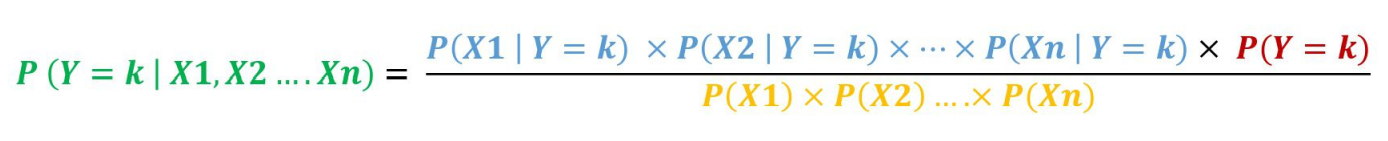
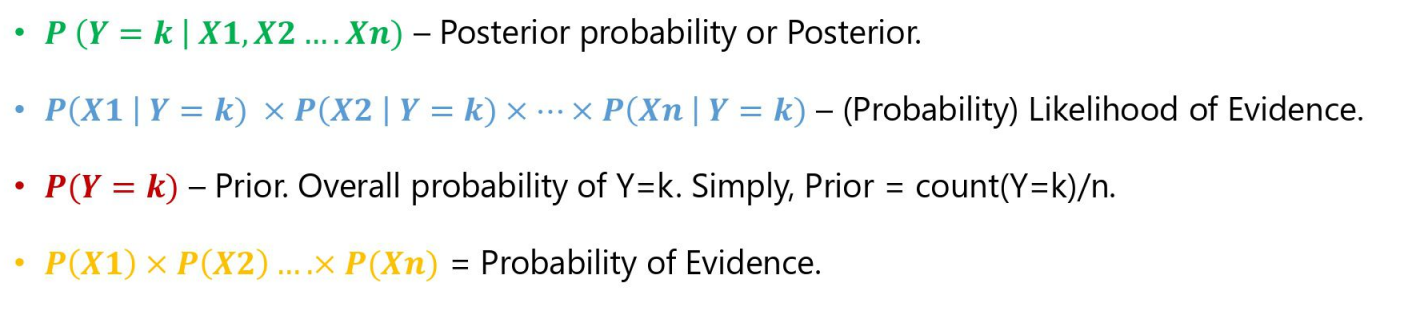

    
##### Conditional probabilty - 
    1. It is the probabilty  of one event occuring with some relationship to one or more other events.
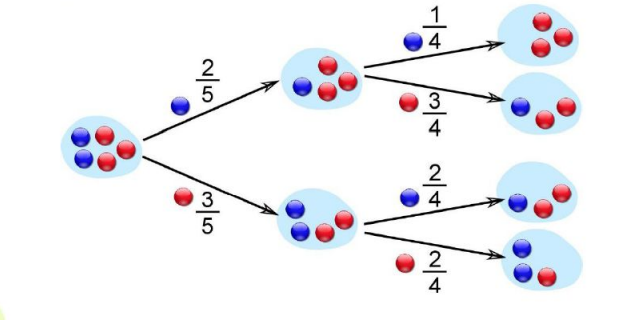

    2. for ex. if we have 2 blue ball and 3 red ball i.e total 3 balls in a bag, and if want to find the probabilty of drawing red ball if blue ball is already drawn then we simple use conditional probabilty i.e P(Red | Blue).
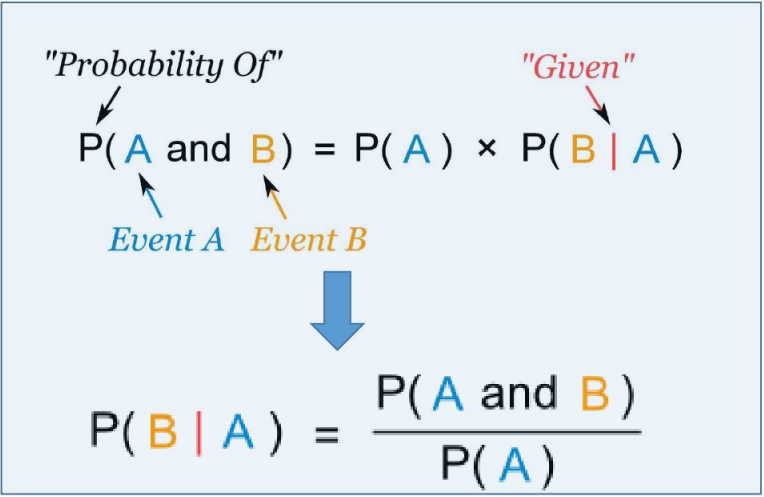


##### Bayes Theorem working - 
    1. Bayes Theorem are classified in two types one is for binomial classification and other for multinomial classification.
    2. Gaussian NB is used for binomial classification.

##### Navie Bayes Machine Learning model Intution - 
    1. Gaussina NB assume that the data is distributed according to gaussina dist or normal distribution, i.e if the data is plotted is should form the bell shpe curve.
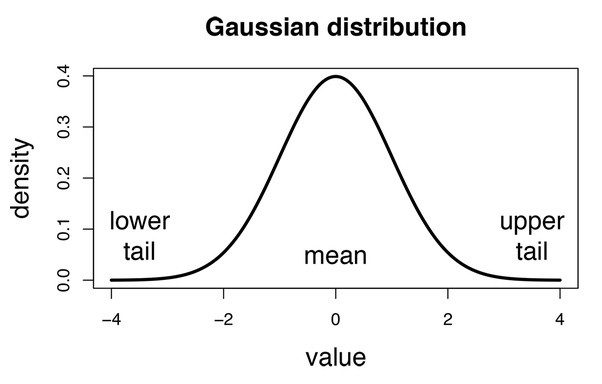

    2. the conditional probability of Gaussina NB is defined as P(X) = 1 / sqrt( 2pi sigma^2 ) * e ^ -( x - mue)/ sigma^2).
    3. basically the probability density function for normal distribution is defined by mean and std.
    


##### Metrices - 
##### Confusion matrix - 
    1. This matrix shows that how much data is classified as positive and negative as well as it also indicates that how that positive and negatve classification done w.r.t positive and negative classe, i.e. True positive, False Positive, True Negative, False NEgative
    2. True Positive - It is noting but how much positive we are predeicted that are acutually positive. i.e actaul also +ve and predited also +ve
    3. False Positive - It shows that how much positive we are predicted that are actually false i.e. actaul is -ve but predicted as +ve
    4. True Negative - It sows that how much negative we are predicted that are actaully negaive i.e actual is -ve and predicted is also -ve.
    5. False Negative - It shows that how much negative we are predicted that are actaually positive i.e actual is +ve but predicted as -ve.
    6. By using confusion matrix we can comes up with precision, recall, accuracy, f1-score etc.
    
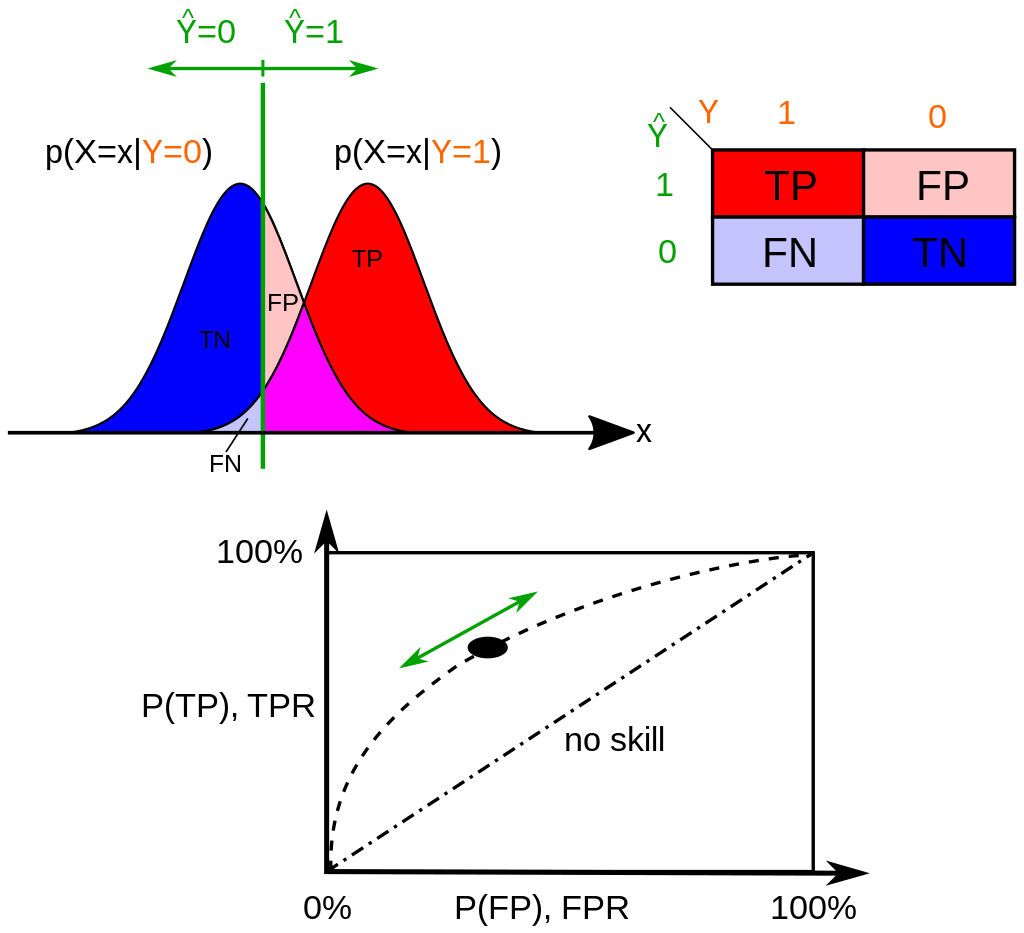
    
##### Accuracy - 
    1. It is nothing but how much correct we are predicte from the total data i.e TP+TN / TP+TN+FP+FN
    2. it is a measuer which shows that how much confident our algorihtm on the data in prediction 
 
##### Precision -
    1. Precison is nothing but a positive predicted rate i.e TP / TP+FP
    2. for example assume that we have True positive as 4 and TP+FP as 4+1 then our Precision is 4/4+1 i.e. 4/5
    3. in any casey your TPR should be as possible as more.
    
##### Recall -
    1. Recall score is measure of TP / TP+FN i.e ratio of TP and TP+FN which should be high as possible as it can.
    2. Recall is also called as sebsitivity which is calculated on total datapoints.

##### F1-score -
    1. F1-Score is measure in case of data imabalnce and it is best fit between Precision and Recall.
    2. F1-Score is 2*precision + recall / Precision * recall.
    3. F1 score shouuld be as possible as high as it is combination of precision and recall

* Problem Statement - Prediction of Dibettes with the helps of medical attributes and Machine Learning algorith.
* Dataset - Dibetes dataset from Kaggle.
- Dataset Description
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

- Number of Observation Units: 768
- Variable Number: 9

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import BaggingClassifier,ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score,f1_score


In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [45]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
data.shape

(768, 9)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

- Here by observing the data we can get to know that there are no null data present in the dataset which is good part for us.
- also we have sufficient data to train the model.
- let's check for 0 values because many time there is no null directly present rather there present a 0 or any specail character.

In [49]:
(data==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

- here we get many 0's like BMI Sking thickness and many more which we have to deal.
- before deing we will train our model and then we impute zero's then retrian model and comapre the result only for cross validation.

In [50]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- by observing the data we can see tht there are some outliers in the Insuli feature.
- also we have known that is is not maximum fesible number for pregnancies i.e 17. hence we have to remove some amount of data from pregnancies.

In [51]:
data[data.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


- Here i am findind the data where Glucose is 0 because it should not be 0 in any case hence it mean that we have to impute them.

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:>

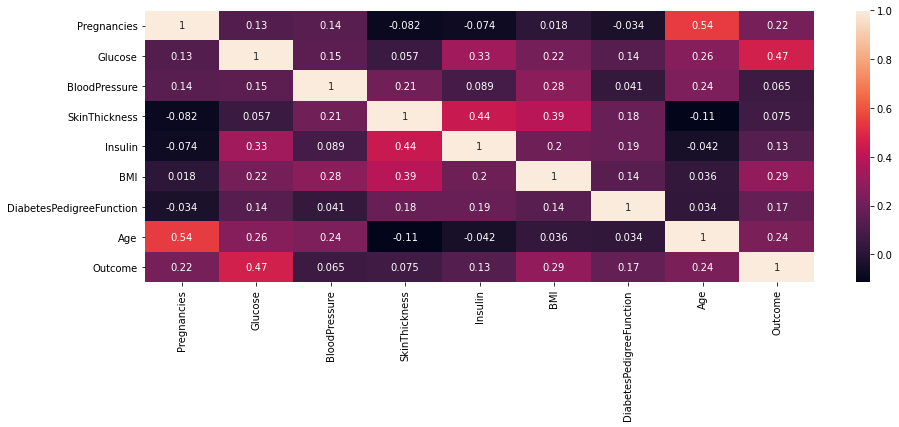

In [52]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True)

- from the above relation i infer that there areonly few feature which are -vely corelated but not stong.
- but age and preg are highly +vely correlate among all

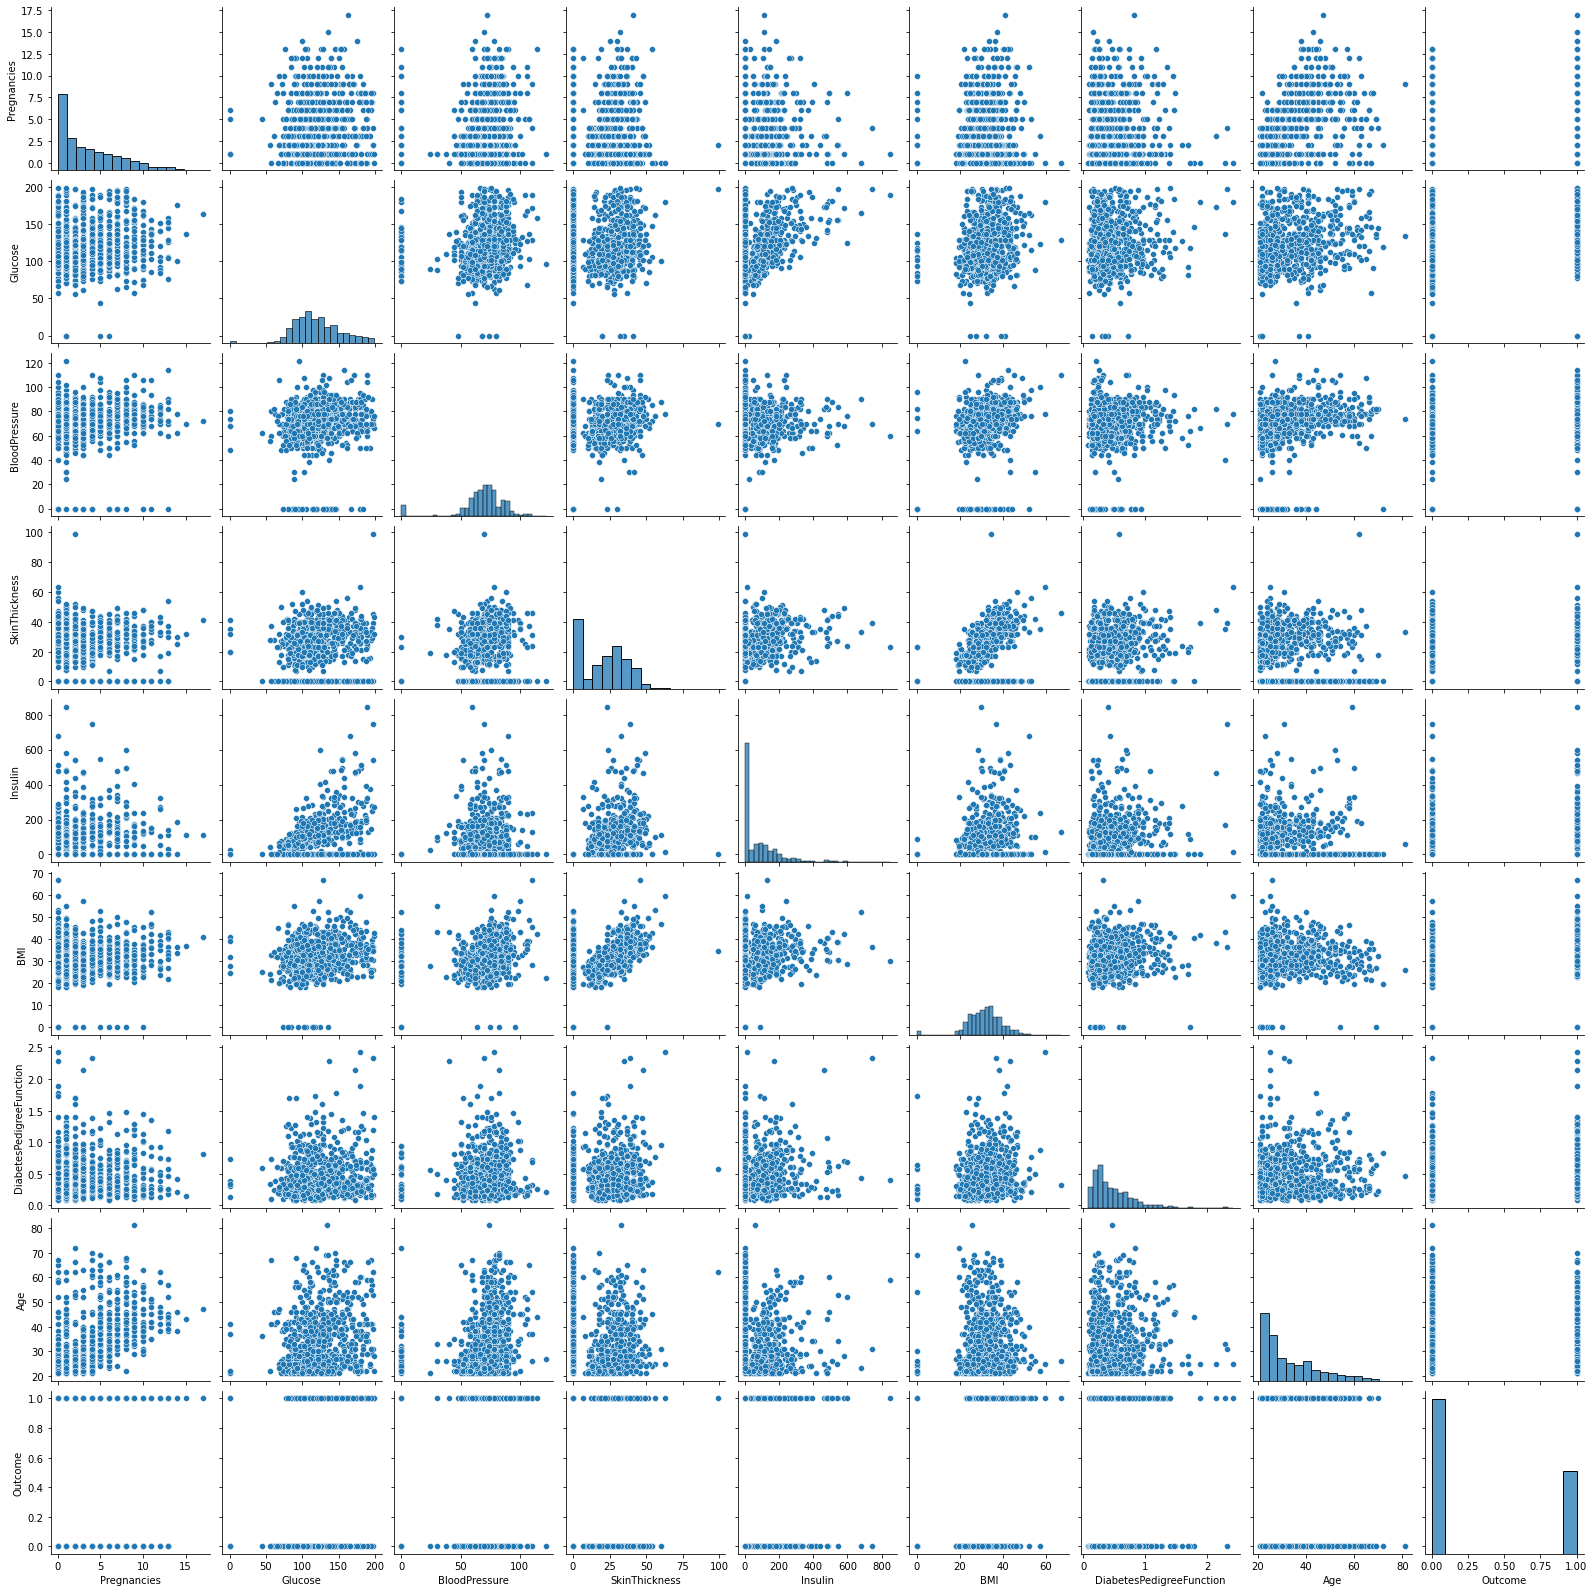

In [53]:
sns.pairplot(data)

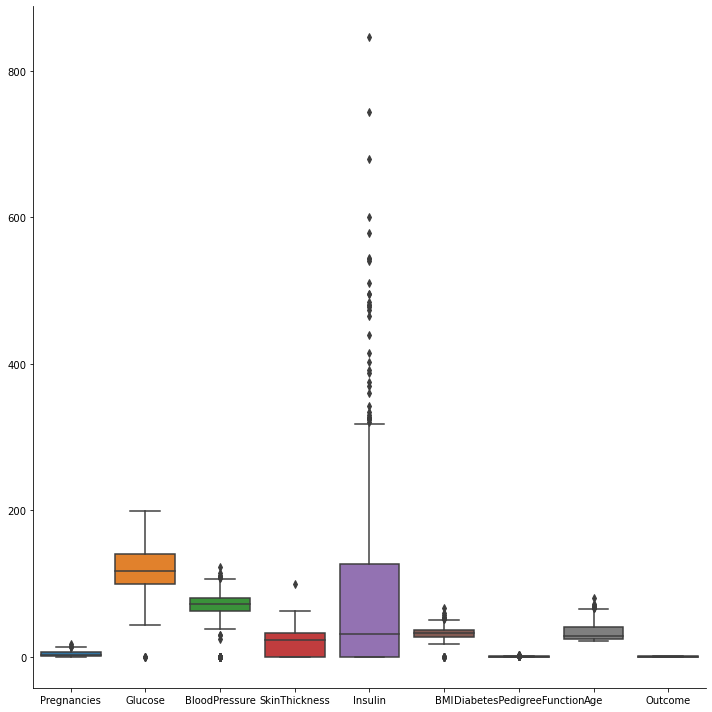

In [54]:
sns.catplot(kind = 'box', data=data, height=10)

- By observing we get that there are outliers in insuline column which we need to either wrap into range or impute with mean or drop.

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

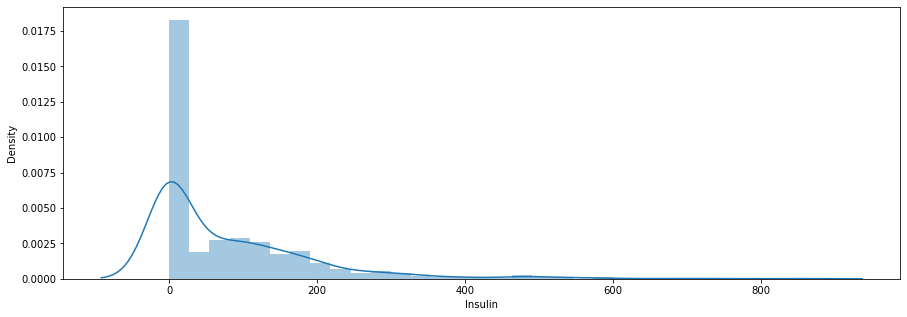

In [55]:
plt.figure(figsize=(15,5))
sns.distplot(data.Insulin)

- here, as we know that insuline should be be as high as we observe in the above plot.

#### Model Building

In [56]:
X = data.drop('Outcome',axis=1)
y = data.Outcome
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42) 
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss

def classification_metric(y_test,y_pred,y_prob,label,n=1,verbose=False):
    
    # confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    row_sum = cm.sum(axis=0)
    cm = np.append(cm,row_sum.reshape(1,-1),axis=0)
    col_sum = cm.sum(axis=1)
    cm = np.append(cm,col_sum.reshape(-1,1),axis=1)

    labels = label+['Total']
    plt.figure(figsize=(10,6))
    sns.heatmap(cm,annot=True,cmap='summer',fmt='0.2f',xticklabels=labels,
                yticklabels=labels,linewidths=3,cbar=None,)

    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('*'*30+'Classifcation Report'+'*'*30+'\n\n')
    cr = classification_report(y_test,y_pred)
    print(cr)
    
    print('\n'+'*'*36+'Kappa Score'+'*'*36+'\n\n')
    # Kappa score
    kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
    print('Kappa Score =',kappa)
    
    print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
    # Kappa score
    roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
    print('AUC Score =',roc_a)
    
    # ROC
    plt.figure(figsize=(8,5))
    fpr,tpr, thresh = roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,'r')
    print('Number of probabilities to build ROC =',len(fpr))
    if verbose == True:
        for i in range(len(thresh)):
            if i%n == 0:
                plt.text(fpr[i],tpr[i],'%0.2f'%thresh[i])
                plt.plot(fpr[i],tpr[i],'v')


    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characterstic')
    plt.legend(['AUC = {}'.format(roc_a)])
    plt.plot([0,1],[0,1],'b--',linewidth=2.0)
    plt.grid()
    plt.show()
  







  
    
class threshold():
    
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0

In [58]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
y_pred_prob_gnb = gnb.predict_proba(X_test)[:,1]
print('Gaussian Navie Bayes with default parameter ')
print('Trainig Score: ', gnb.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_gnb))

GaussianNB()

Gaussian Navie Bayes with default parameter 
Trainig Score:  0.752442996742671
Testing Accuracy Score:  0.7662337662337663


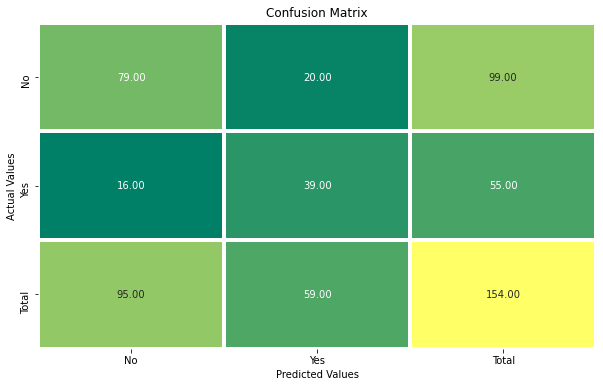

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


************************************Kappa Score************************************


Kappa Score = 0.4990059642147118

******************************Area Under Curve Score******************************


AUC Score = 0.7535353535353535
Number of probabilities to build ROC = 56


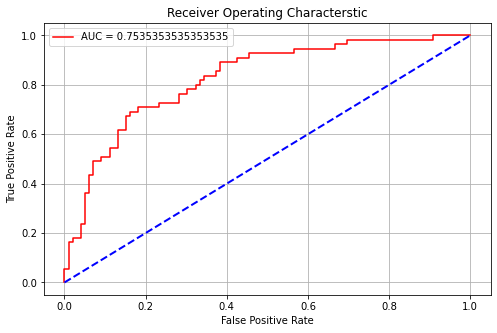

In [59]:
classification_metric(y_test,y_pred_gnb,y_pred_prob_gnb,label=['No','Yes'])

- Here we got less accuracy it mean that we have high error right now.
- let's try to tune the Gaussian NB and see the result
- first we will try with imputing 0 with mean values


In [34]:
data.Glucose.mean()

120.89453125

In [35]:
data['Glucose'] = data.Glucose.replace(0, np.NaN)
data['Glucose'].fillna(data.Glucose.mean(), inplace=True)

In [37]:
a = []
for col in data:
    if ((data[col]==0).sum() > 0):
        if col != 'Outcome':
            a.append(col)
zero_cols = a[1:]   # because we know that there might be 0 pregn. 

In [38]:
zero_cols

['BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [39]:
for column in zero_cols:
    data[column] = data[column].replace(0, np.NaN)
    data[column].fillna(data[column].mean(), inplace=True)

In [40]:
X = data.drop('Outcome',axis=1)
y = data.Outcome
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42) 
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [41]:
gnb2 = GaussianNB()
gnb2.fit(X_train,y_train)
y_pred_gnb2 = gnb2.predict(X_test)
y_pred_prob_gnb2 = gnb2.predict_proba(X_test)[:,1]
print('Gaussian Navie Bayes with default parameter ')
print('Trainig Score: ', gnb2.score(X_train,y_train))
print('Testing Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_gnb2))

GaussianNB()

Gaussian Navie Bayes with default parameter 
Trainig Score:  0.744299674267101
Testing Accuracy Score:  0.7467532467532467


- Eventually we have decreased our accuracy by 1%.

### Conclusion - 
- As we have trained 2 different models with different parameters but have't gow any change in accuracy neither decreasing nor increasing.
- as we know that we have data which consist of many 0 values which may also lead to improper classififcation.
- our model with deafult parameter is my suggesion on this data.